## 1. Install Tensorflow and Check for GPU

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 40.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0
Read

In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [4]:
# check if TF detected GPU 
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


## 2. Clone TFOD Github repository

In [5]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 82020, done.
remote: Counting objects: 100% (487/487), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 82020 (delta 310), reused 419 (delta 268), pack-reused 81533
Receiving objects: 100% (82020/82020), 596.38 MiB | 20.97 MiB/s, done.
Resolving deltas: 100% (58509/58509), done.


In [6]:
cd /content/models/research

/content/models/research


In [7]:
!protoc object_detection/protos/*.proto --python_out=.

## 3. Clone and Install COCO-API Github repository

In [8]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 25.54 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [9]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [10]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.9/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.9
creating build/temp.linux-x86_64-3.9/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.9/dist-packages/numpy/core/include -I../common -I/usr/include/python3.9 -c ../common/maskApi.c -o build/temp.linux-x86_64-3.9/

In [11]:
cp -r pycocotools /content/models/research

In [12]:
cd /content/models/research

/content/models/research


In [13]:
pwd

'/content/models/research'

## 4. Install TF Object Detection API

In [14]:
cp object_detection/packages/tf2/setup.py .

In [15]:
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 

In [38]:
cd /content/models/research/

/content/models/research


In [39]:
pwd

'/content/models/research'

In [20]:
# necessary orelse some commands will fail
!pip install 'h5py==2.10.0' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 56.7 MB/s eta 0:00:00
  Created wheel for h5py: filename=h5py-2.10.0-cp39-cp39-linux_x86_64.whl size=5730710 sha256=78086ce7fb511deb8c453c73dcdd92879e521fb6a98c750202e1122318993ae5
  Stored in directory: /root/.cache/pip/wheels/91/57/54/aa5901c840e89c1e931141d848b27421f68ad98bd285cc4036
Successfully built h5py
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Succes

In [43]:
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp39-cp39-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cmdstanpy 1.1.0 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [44]:
import numpy  
print(numpy.__version__)

numpy.typeDict = numpy.sctypeDict

1.22.4


## 5. Test TF Object Detection API Installation Sucess

In [45]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.9.16: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0311 07:39:41.243642 140378351277888 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.14s
I0311 07:39:41.680815 140378351277888 test_util.py:2457] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.14s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.02s
I0311 07:39:42.705786 140378351277888 test_util.py:2457] time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.02s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
[ RUN     

In [46]:
cd /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/pre-trained-models

/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/pre-trained-models


## 6. Download Pre-trained model from TF Model Zoo

**The reference link to TF model zoo :** https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [47]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2023-03-11 07:40:31--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c0a::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90453990 (86M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz.14’

ssd_mobilenet_v1_fp 100%[===================>]  86.26M  85.7MB/s    in 1.0s    

2023-03-11 07:40:32 (85.7 MB/s) - ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz.14’ saved [90453990/90453990]



In [48]:
!tar -xvf ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [49]:
cd /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo

/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo


In [50]:
pwd

'/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo'

## 7. Generate TF Records

In [51]:
# Create train data:
!python generate_tfrecord.py -x /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/images/train -l  /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/images/test -l  /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/annotations/test.record


In [52]:
pwd

'/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo'

In [29]:
# pip install --upgrade numpy

In [53]:
!pip install pip install opencv-python-headless==4.1.2.30 opencv-python==4.1.2.30 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached install-1.3.5-py3-none-any.whl (3.2 kB)
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


In [56]:
!pip install pycocotools==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0.0-cp39-cp39-linux_x86_64.whl size=397861 sha256=fd2b220f38bcfec8d2e6ff27925380beccae7120ef97a31b380d880fef15f64c
  Stored in directory: /root/.cache/pip/wheels/9f/11/12/2613a31c3175b133ef1de8d4d821726eed4cb9ed882c1a9f57
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6


In [57]:
!pip list 

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
apache-beam                   2.46.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astropy                       4.3.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
avro-python3                  1.10.2
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4 

## 8. Training the model

The below command started training of the object detection model

In [65]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0311 08:04:18.808428 140539399354176 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0311 08:04:18.817551 140539399354176 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0311 08:04:18.817752 140539399354176 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0311 08:04:18.855893 140539399354176 deprecation.py:350] From /usr/local/lib/python3.9/dist-packages/object_detection/model_lib_v2.py:563: StrategyBase.experimental_distribute_datasets_from_function (from tensorflow.python.distribute.distribute_lib) is deprecated and will be removed in a future version.
Instructions for updating:
rename to distribute_datasets_from_function
INFO

In [66]:
pwd

'/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo'

## 9. Exporting the trained model

In [67]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/models/my_ssd_resnet101_v1_fpn --output_directory /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/exported_models/my_model

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
W0311 08:27:48.026824 140276719851328 deprecation.py:350] From /usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/pyct/static_analysis/liveness.py:83: Analyzer.lamba_check (from tensorflow.python.autograph.pyct.static_analysis.liveness) is deprecated and will be removed after 2023-09-23.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0311 08:27:48.138509 140276719851328 deprecation.py:623]

In [61]:
!pip install opencv-python==4.5.5.62

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 10. Running Inference using Trained model

Loading model...Done! Took 12.42818808555603 seconds
Running inference for /content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/images/train/Image_34_weed.jpg... [2 2 2 1 2 2 2 1 2 2 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1
 1 1 2 1 1 2 1 2 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 1 2 1 2 1 1 1 1 1 1 2 1 1
 1 1 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 2 2 2 1 1]
[0.9981035  0.99691856 0.99236697 0.9904895  0.98843503 0.9879391
 0.98528105 0.75569737 0.16582263 0.14110821 0.13641542 0.1149588
 0.05098407 0.04839395 0.0436844  0.04158647 0.03784418 0.03483097
 0.03438655 0.03040925 0.0294542  0.02830449 0.02826256 0.02717156
 0.02706733 0.02631839 0.02436169 0.02433979 0.023655   0.02342453
 0.02340426 0.02302191 0.02275467 0.02273384 0.02223337 0.02218276
 0.02126641 0.02105794 0.01995799 0.01988811 0.01985748 0.01946299
 0.01925088 0.01912693 0.01908609 0.01883896 0.01866289 0.01864673
 0.01859599 0.01859415 0.01850307 0.01849922 0.01849172 0.01785265
 0.01780271 0.01750541 0.0

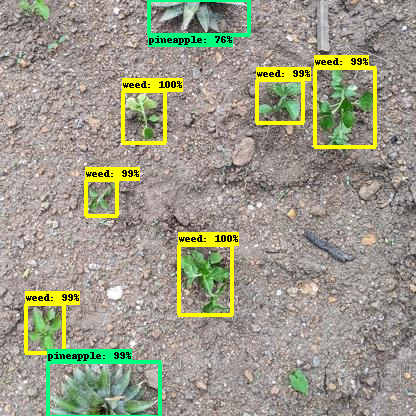

In [75]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/images/train/Image_34_weed.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/drive/MyDrive/fiverr-Yuganrajsadi651/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.40)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

print(detections['detection_classes'])
print(detections['detection_scores'])

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=10,
      min_score_thresh=0.50,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


## Conclusion : We have sucessfully trained a object detection model and exported it.